# Identifying good and bad loan 
## by Sumit K Mahato

## Investigation Overview

> I am interested in the effect of various factors on the Borrower APR and which factors affect the status of a loan. This presentation outlines the correlation of Borrower APR with other numerical variables and which characteristics of a loan make it more risky.

## Dataset Overview

> The dataset consists of 113937 observations and 81 variables. However, for this analysis I will be considering only 20 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('C:\\Users\\smahato\\Desktop\\Udacity_data_visualization project\\prosperLoanData.csv')
#rename columns with spaces
df_loan.rename(columns = {"ProsperRating (numeric)":"ProsperRating(numeric)", "ProsperRating (Alpha)":"ProsperRating(Alpha)", 
                "ListingCategory (numeric)":"ListingCategory(numeric)", 
                "TradesNeverDelinquent (percentage)":"TradesNeverDelinquent(percentage)"},inplace = True)

#Subset the dataframe to contain only features of interest
df_loan_sub = df_loan[["ListingNumber","ListingCreationDate","Term","LoanStatus","BorrowerAPR",
                       "ListingCategory(numeric)", "BorrowerState","EmploymentStatus",
                       "EmploymentStatusDuration", "IsBorrowerHomeowner", "CreditScoreRangeLower", "CreditScoreRangeUpper","TotalInquiries",
                       "FirstRecordedCreditLine", "TotalCreditLinespast7years", "RevolvingCreditBalance", "DebtToIncomeRatio",
                       "IncomeRange"]]

#ListingCreationDate and FirstRecordedCreditLine changed to timestamp and only datepart was extracted from the timestamp

df_loan_sub[ 'FirstRecordedCreditLine'] = pd.to_datetime(df_loan_sub['FirstRecordedCreditLine'], format= '%Y/%m/%d').dt.date
df_loan_sub[ 'FirstRecordedCreditLine'] = pd.to_datetime(df_loan_sub['FirstRecordedCreditLine'], format= '%Y/%m/%d')

df_loan_sub['ListingCreationDate'] = pd.to_datetime(df_loan_sub['ListingCreationDate'], format= '%Y/%m/%d').dt.date
df_loan_sub['ListingCreationDate'] = pd.to_datetime(df_loan_sub['ListingCreationDate'], format= '%Y/%m/%d')

In [3]:
#The age of credit line of the borrower

df_loan_sub['CreditLineAge'] = (df_loan_sub.ListingCreationDate - df_loan_sub.FirstRecordedCreditLine).dt.days

In [4]:
numeric_vars = ['BorrowerAPR', 'EmploymentStatusDuration', 'CreditScoreRangeUpper', 
                'TotalCreditLinespast7years', 'TotalInquiries', 'RevolvingCreditBalance', 'CreditLineAge', 'DebtToIncomeRatio']

categoric_vars = ['IsBorrowerHomeowner', 'IncomeRange', 'Term', 'ListingCategory(numeric)', 'EmploymentStatus','LoanStatus']             
                
                

## Correlation b/w numeric variables

The correlation plot between different plots show that there is a negative correlation b/w Borrower APR and Credit score and a positive correlation b/w Borrower APR and Total no. of inquiries. We will explore these 2 in further slides.

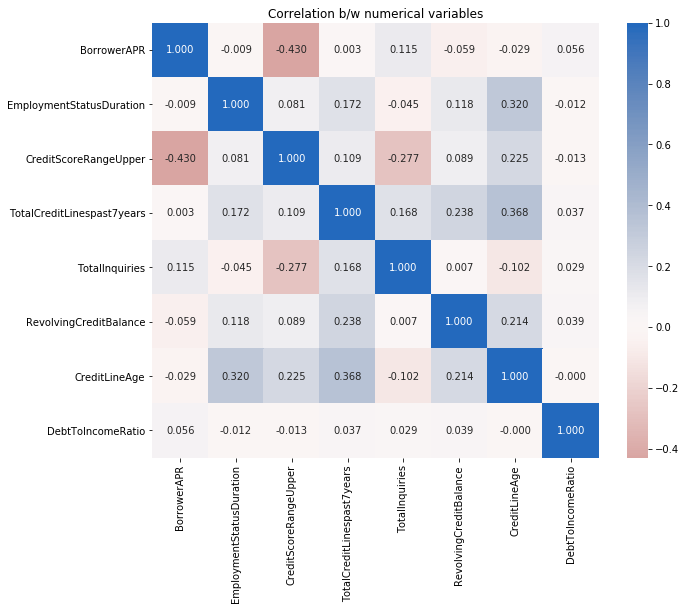

In [5]:
# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(df_loan_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation b/w numerical variables')
plt.show()

## Default rates for different income range

> The plots below show that borrowers are mostly from 25K dollar to 75K dollar group. There is an obvious decrease in chance of defaulting and charged off with with increase in income.

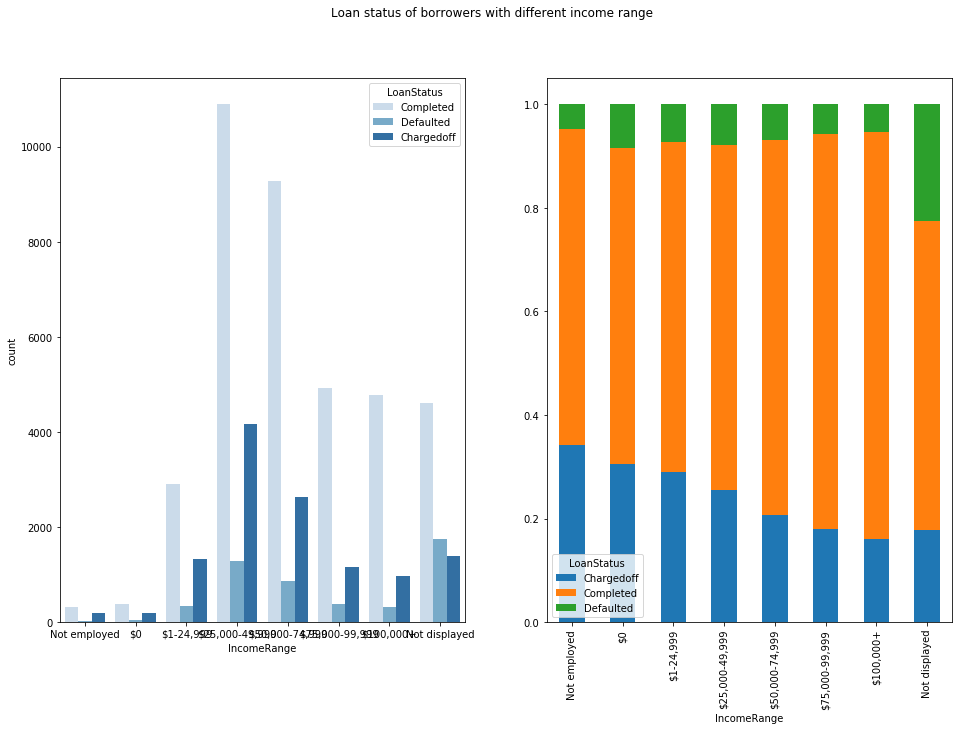

In [6]:
#Subset the dataframe to contain Loan status Completed, Defaulted, Chargedoff
#set the order of the incomes
level_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
               '$100,000+', 'Not displayed']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_loan_sub['IncomeRange'] = df_loan_sub['IncomeRange'].astype(ordered_cat)


df_loan_status = df_loan_sub[df_loan_sub['LoanStatus'].str.contains("Completed|Defaulted|Chargedoff")]
f, axes = plt.subplots(1,2,figsize=(16,10))
sb.countplot(data = df_loan_status, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Blues', ax=axes[0])
props = df_loan_status.groupby('IncomeRange')['LoanStatus'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', ax=axes[1])
f.suptitle('Loan status of borrowers with different income range');  


## Which loans have high chance of being completed/default

>On plotting, credit scores on borrower APR we found that there were quite a few borrowers who had high credit scores yet they got loans at high APR. Since, Total Inquiries is the next strongly correlated variable to BorrowerAPR. Plotting it against credit scores we find that there are few high credit score borrowers who has high number of inquiries. These inquiries earns them High APR and eventually they default.

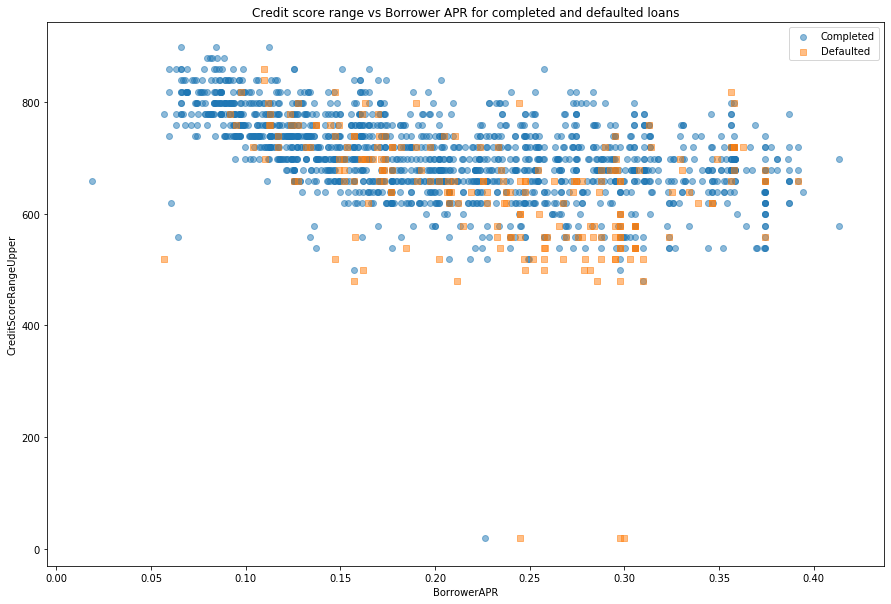

In [7]:
samples = np.random.choice(df_loan.shape[0], 5000, replace = False)
loan_samp3 = df_loan.loc[samples,:]

#function to plot scatter plots b/w numeric variables

def scatter(x, y):
    plt.figure(figsize = [15, 10])
    cat_markers = [['Completed', 'o'], ['Defaulted', 's']]

    for cat, marker in cat_markers:
        df_cat = loan_samp3[loan_samp3['LoanStatus'] == cat]
        plt.scatter(data = df_cat, x = x, y = y, marker = marker, alpha = 0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(['Completed','Defaulted']);
    
scatter('BorrowerAPR', 'CreditScoreRangeUpper')
plt.title('Credit score range vs Borrower APR for completed and defaulted loans');

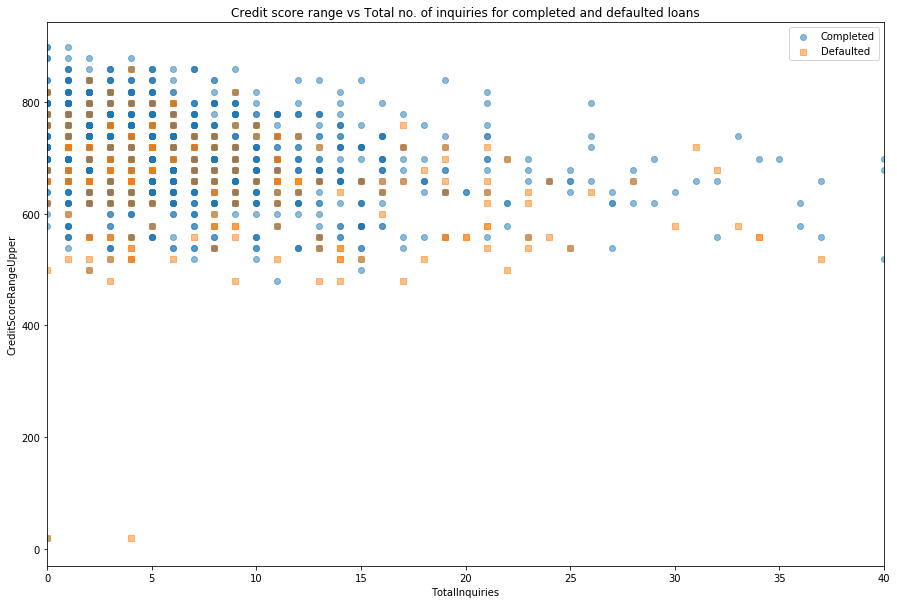

In [8]:
scatter('TotalInquiries', 'CreditScoreRangeUpper')
plt.title('Credit score range vs Total no. of inquiries for completed and defaulted loans')
plt.xlim(0,40);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [9]:
!jupyter nbconvert Data_visualization_slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Data_visualization_slide_deck.ipynb to slides
[NbConvertApp] Writing 571212 bytes to Data_visualization_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\smahato\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\smahato\Anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\smahato\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\smahato\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\smahato\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_note